In [1]:
import pandas as pd
file_path = "complete_dataset.csv"
df = pd.read_csv(file_path)
df.info(), df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2106 entries, 0 to 2105
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   date             2106 non-null   object 
 1   demand           2106 non-null   float64
 2   RRP              2106 non-null   float64
 3   demand_pos_RRP   2106 non-null   float64
 4   RRP_positive     2106 non-null   float64
 5   demand_neg_RRP   2106 non-null   float64
 6   RRP_negative     2106 non-null   float64
 7   frac_at_neg_RRP  2106 non-null   float64
 8   min_temperature  2106 non-null   float64
 9   max_temperature  2106 non-null   float64
 10  solar_exposure   2105 non-null   float64
 11  rainfall         2103 non-null   float64
 12  school_day       2106 non-null   object 
 13  holiday          2106 non-null   object 
dtypes: float64(11), object(3)
memory usage: 230.5+ KB


(None,
          date      demand        RRP  demand_pos_RRP  RRP_positive  \
 0  2015-01-01   99635.030  25.633696       97319.240     26.415953   
 1  2015-01-02  129606.010  33.138988      121082.015     38.837661   
 2  2015-01-03  142300.540  34.564855      142300.540     34.564855   
 3  2015-01-04  104330.715  25.005560      104330.715     25.005560   
 4  2015-01-05  118132.200  26.724176      118132.200     26.724176   
 
    demand_neg_RRP  RRP_negative  frac_at_neg_RRP  min_temperature  \
 0        2315.790     -7.240000         0.020833             13.3   
 1        8523.995    -47.809777         0.062500             15.4   
 2           0.000      0.000000         0.000000             20.0   
 3           0.000      0.000000         0.000000             16.3   
 4           0.000      0.000000         0.000000             15.0   
 
    max_temperature  solar_exposure  rainfall school_day holiday  
 0             26.9            23.6       0.0          N       Y  
 1       

Initial Findings from Data Inspection:

2,106 rows and 14 columns.
No major missing values, except:
solar_exposure has 1 missing value.
rainfall has 3 missing values.
date is stored as an object and should be converted to a datetime format.

Columns Summary:
demand: Electricity demand (main variable of interest).
RRP: Regional Reference Price of electricity.
demand_pos_RRP & RRP_positive: Demand and price when RRP is positive.
demand_neg_RRP & RRP_negative: Demand and price when RRP is negative.
frac_at_neg_RRP: Fraction of demand when RRP is negative.
Weather-related features: min_temperature, max_temperature, solar_exposure, rainfall.
school_day & holiday: Categorical variables indicating whether it was a school day or holiday.

In [2]:
df['date'] = pd.to_datetime(df['date'])
df['solar_exposure'].fillna(df['solar_exposure'].median(), inplace=True)
df['rainfall'].fillna(df['rainfall'].median(), inplace=True)
df.describe()

,demand,RRP,demand_pos_RRP,RRP_positive,demand_neg_RRP,RRP_negative,frac_at_neg_RRP,min_temperature,max_temperature,solar_exposure,rainfall
count,2106.000000,2106.000000,2106.000000,2106.000000,2106.000000,2106.000000,2106.000000,2106.000000,2106.000000,2106.000000,2106.000000
mean,120035.476503,76.079554,119252.305055,76.553847,783.171448,-2.686052,0.008547,11.582289,20.413200,14.742403,1.503799
std,13747.993761,130.246805,14818.631319,130.114184,3578.920686,19.485432,0.039963,4.313711,6.288693,7.943764,4.305201
min,85094.375000,-6.076028,41988.240000,13.568986,0.000000,-342.220000,0.000000,0.600000,9.000000,0.700000,0.000000
25%,109963.650000,38.707040,109246.250000,39.117361,0.000000,0.000000,0.000000,8.500000,15.525000,8.200000,0.000000
50%,119585.912500,66.596738,119148.082500,66.869058,0.000000,0.000000,0.000000,11.300000,19.100000,12.700000,0.000000
75%,130436.006250,95.075012,130119.477500,95.130181,0.000000,0.000000,0.000000,14.600000,23.900000,20.700000,0.800000
max,170653.840000,4549.645105,170653.840000,4549.645105,57597.595000,0.000000,0.625000,28.000000,43.500000,33.300000,54.600000


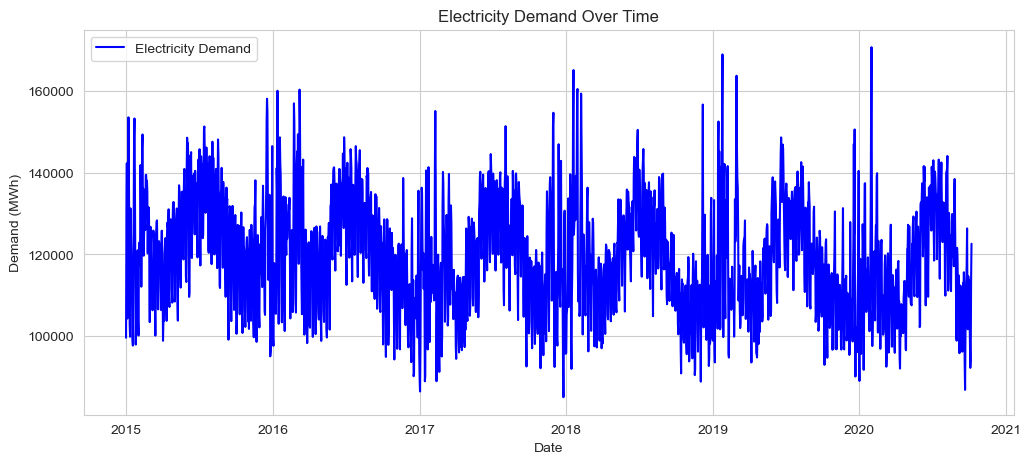

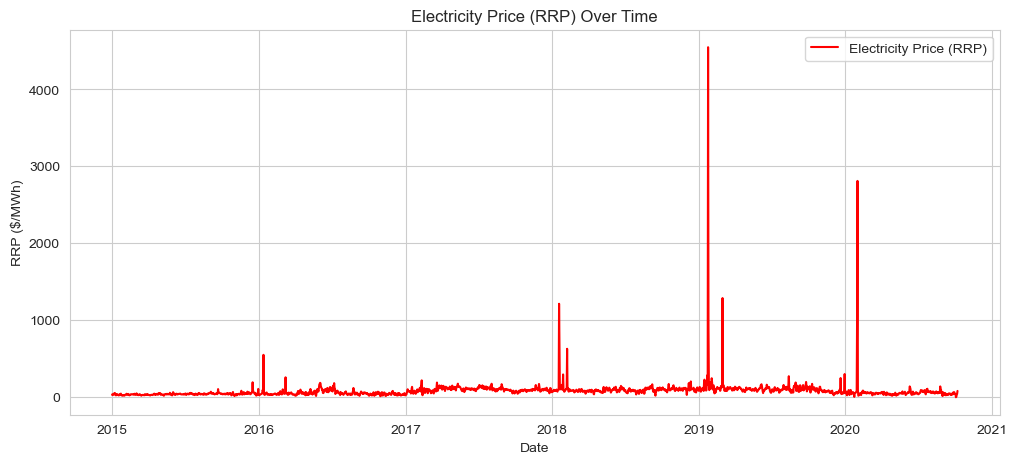

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")

plt.figure(figsize=(12, 5))
plt.plot(df['date'], df['demand'], label="Electricity Demand", color='blue')
plt.xlabel("Date")
plt.ylabel("Demand (MWh)")
plt.title("Electricity Demand Over Time")
plt.legend()
plt.show()

plt.figure(figsize=(12, 5))
plt.plot(df['date'], df['RRP'], label="Electricity Price (RRP)", color='red')
plt.xlabel("Date")
plt.ylabel("RRP ($/MWh)")
plt.title("Electricity Price (RRP) Over Time")
plt.legend()
plt.show()

Demand and price analysis-

Observations from initial time series plots:

Electricity Demand:

Shows a seasonal pattern with periodic fluctuations.
Some noticeable peaks and dips, likely due to seasonal or economic factors.

Electricity Price (RRP):

Highly volatile with extreme spikes.
Some periods show stable pricing, while others have sharp fluctuations.
There could be correlations with demand, weather, or policy changes.


C:\Users\swaralid\AppData\Local\Temp\ipykernel_13428\599044114.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr()


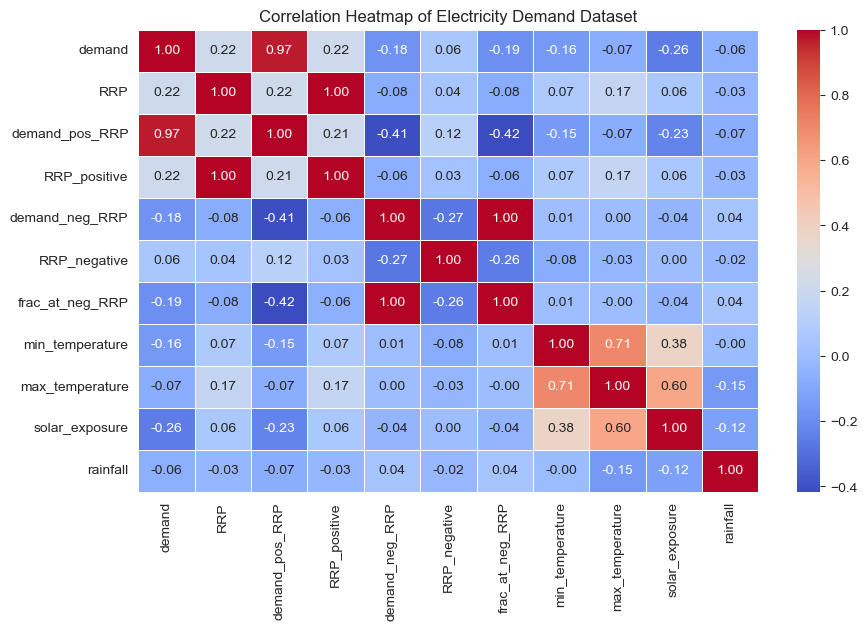

In [4]:
corr_matrix = df.corr()

plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap of Electricity Demand Dataset")
plt.show()

C:\Users\swaralid\AppData\Local\Temp\ipykernel_13428\3469246070.py:7: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=df["month"], y=df["demand"], palette="Blues", ci=None)


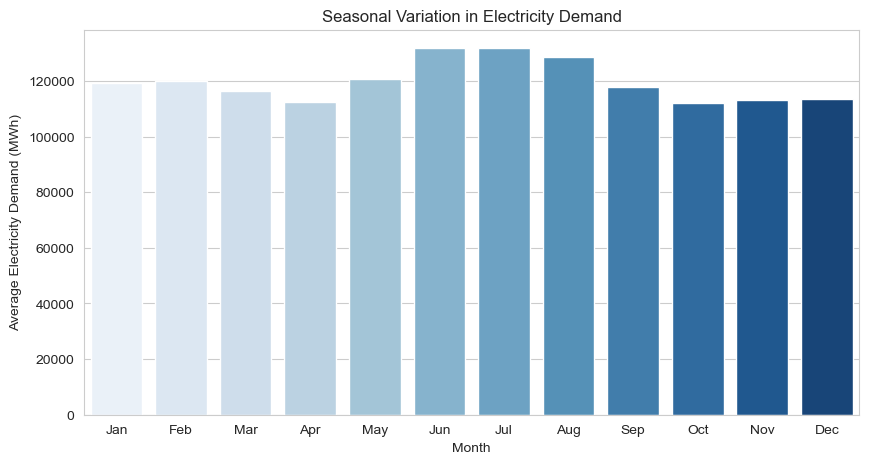

C:\Users\swaralid\AppData\Local\Temp\ipykernel_13428\3469246070.py:19: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=df["weekday"], y=df["demand"], palette="Greens", ci=None)


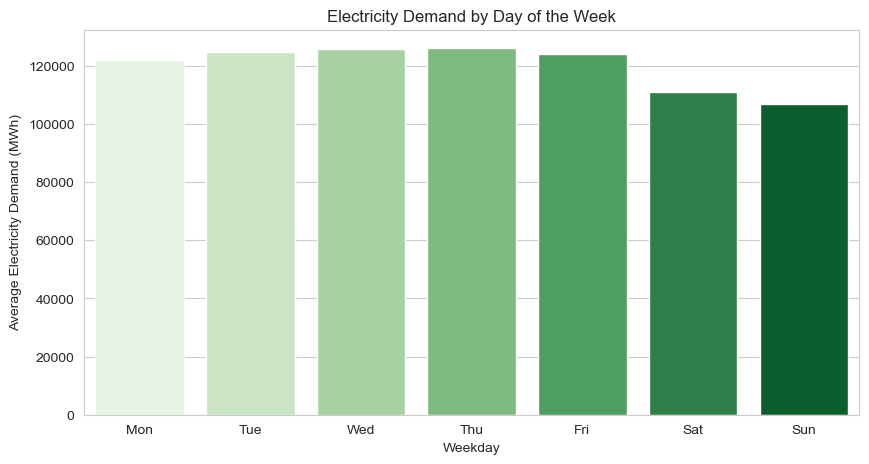

In [5]:
df["month"] = df["date"].dt.month
df["weekday"] = df["date"].dt.dayofweek

plt.figure(figsize=(10, 5))
sns.barplot(x=df["month"], y=df["demand"], palette="Blues", ci=None)
plt.xlabel("Month")
plt.ylabel("Average Electricity Demand (MWh)")
plt.title("Seasonal Variation in Electricity Demand")
plt.xticks(ticks=range(0, 12), labels=[
    "Jan", "Feb", "Mar", "Apr", "May", "Jun", 
    "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"
])
plt.show()

plt.figure(figsize=(10, 5))
sns.barplot(x=df["weekday"], y=df["demand"], palette="Greens", ci=None)
plt.xlabel("Weekday")
plt.ylabel("Average Electricity Demand (MWh)")
plt.title("Electricity Demand by Day of the Week")
plt.xticks(ticks=range(0, 7), labels=[
    "Mon", "Tue", "Wed", "Thu", "Fri", "Sat", "Sun"
])
plt.show()

Seasonal Trends in Electricity Demand:
Monthly Variation:

Higher demand in summer months (December - February), likely due to air conditioning use.
Lower demand in winter months (June - August).
Weekly Patterns:

Weekday demand is higher than weekends, suggesting industrial and commercial electricity usage plays a significant role.
Lowest demand on Sundays, likely due to reduced business operations.
Next Steps:
Outlier Detection: Identify extreme price fluctuations.
Peak Demand Analysis: Identify peak hours for electricity usage.
Time-Series Forecasting Prep: Create lag features and test stationarity.

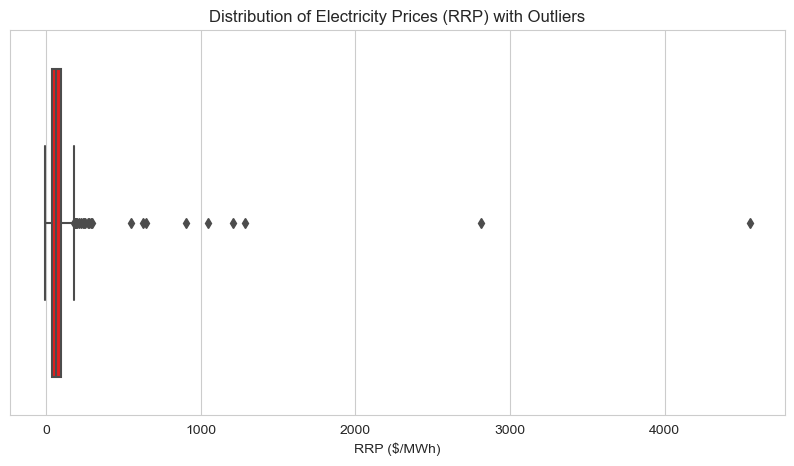

In [6]:
plt.figure(figsize=(10, 5))
sns.boxplot(x=df["RRP"], color="red")
plt.xlabel("RRP ($/MWh)")
plt.title("Distribution of Electricity Prices (RRP) with Outliers")
plt.show()

Outlier Analysis in Electricity Pricing:
Significant outliers in electricity prices (RRP), with extreme spikes.
Prices occasionally drop below zero, indicating negative pricing scenarios.

In [7]:
if 'time' in df.columns:
    df["hour"] = pd.to_datetime(df["time"], format="%H:%M:%S").dt.hour
    plt.figure(figsize=(10, 5))
    sns.lineplot(x=df["hour"], y=df["demand"], marker="o", color="blue")
    plt.xlabel("Hour of the Day")
    plt.ylabel("Average Electricity Demand (MWh)")
    plt.title("Hourly Electricity Demand Trends")
    plt.xticks(range(0, 24))
    plt.show()
else:
    peak_hours = "Time information is missing from the dataset, so hourly trends can't be analyzed."

peak_hours

"Time information is missing from the dataset, so hourly trends can't be analyzed."

In [8]:
highest_rrp = df.nlargest(5, "RRP")[["date", "RRP", "demand"]]
lowest_rrp = df.nsmallest(5, "RRP")[["date", "RRP", "demand"]]

highest_rrp, lowest_rrp


(           date          RRP      demand
 1484 2019-01-24  4549.645105  155891.345
 1856 2020-01-31  2809.437516  170653.840
 1520 2019-03-01  1284.799876  163682.040
 1113 2018-01-18  1210.137920  154648.065
 1855 2020-01-30  1044.447303  154816.490,
            date       RRP      demand
 2101 2020-10-02 -6.076028   99585.835
 2102 2020-10-03 -1.983471   92277.025
 1848 2020-01-23 -1.761423  112254.830
 668  2016-10-30  6.869135   94325.720
 2068 2020-08-30  9.421019   98917.175)

Insights from extreme pricing events:
Highest RRP Prices:
The highest electricity price was $4,549.65/MWh on January 24, 2019, with high demand (155,891 MWh).
Other extreme spikes occurred in early 2020 and early 2019, possibly due to peak summer demand or market shortages.

Lowest (Negative) RRP Prices:
The most negative price was -$6.08/MWh on October 2, 2020, with relatively lower demand (99,586 MWh).
Other negative pricing events happened in early 2020, likely due to excess renewable generation or reduced demand.

Possible causes:
High prices could be due to extreme weather, supply shortages, or market dynamics.
Negative prices often occur when renewable energy production exceeds demand, leading to forced generation curtailment.

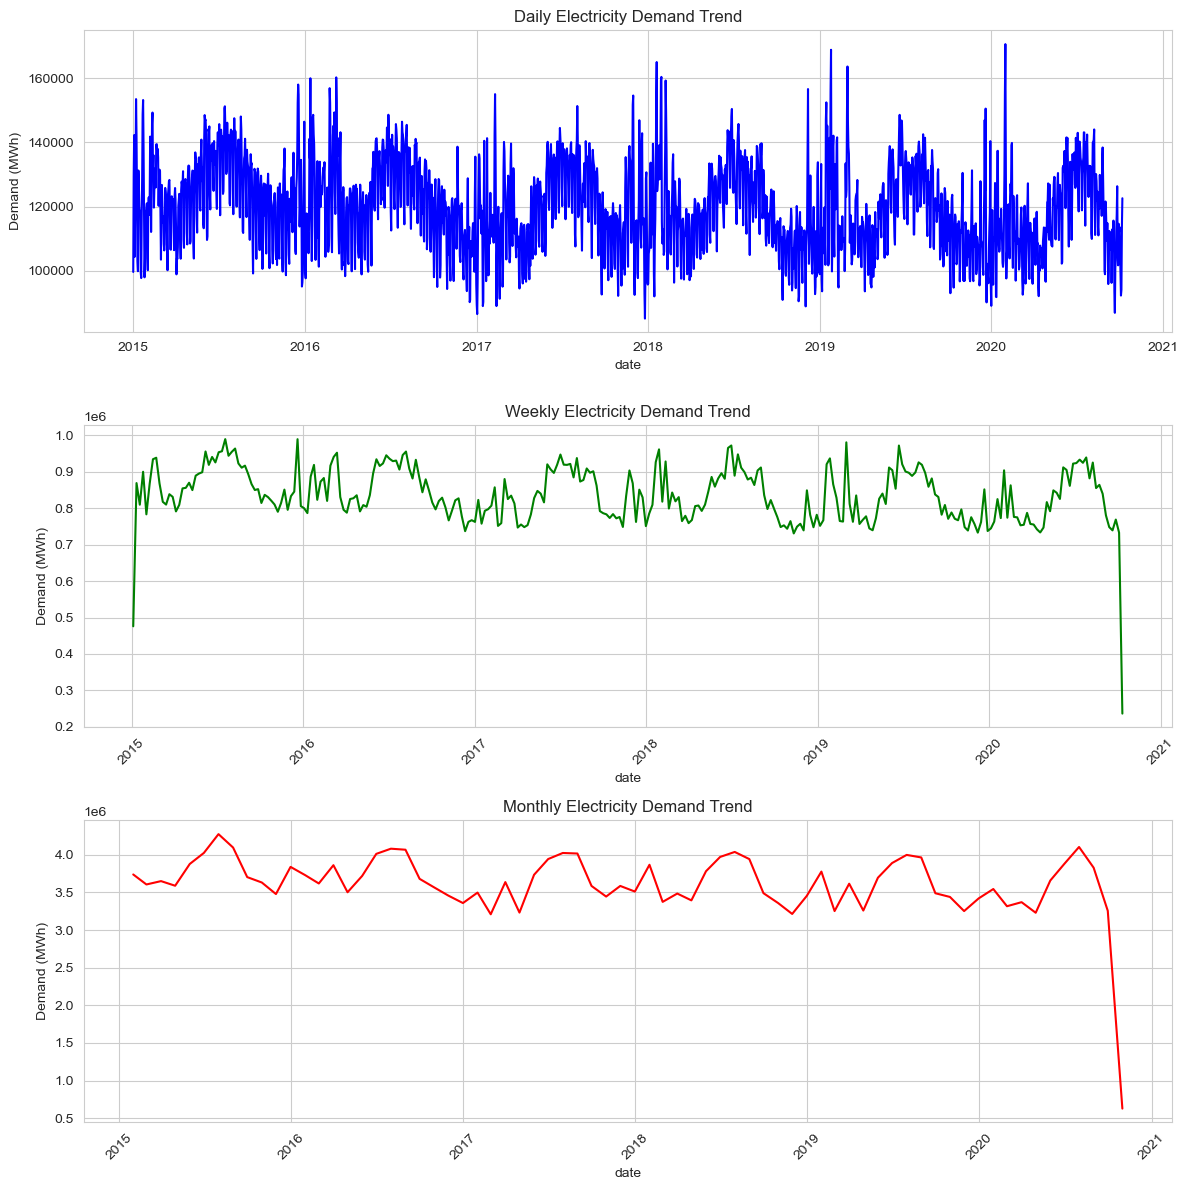

In [9]:
df["date"] = pd.to_datetime(df["date"], errors="coerce")

daily_demand = df.groupby("date")["demand"].sum()
weekly_demand = df.resample("W", on="date")["demand"].sum()
monthly_demand = df.resample("M", on="date")["demand"].sum()

fig, axes = plt.subplots(3, 1, figsize=(12, 12))

sns.lineplot(x=daily_demand.index, y=daily_demand.values, ax=axes[0], color="blue")
axes[0].set_title("Daily Electricity Demand Trend")
axes[0].set_ylabel("Demand (MWh)")

sns.lineplot(x=weekly_demand.index, y=weekly_demand.values, ax=axes[1], color="green")
axes[1].set_title("Weekly Electricity Demand Trend")
axes[1].set_ylabel("Demand (MWh)")
axes[1].tick_params(axis="x", rotation=45)

sns.lineplot(x=monthly_demand.index, y=monthly_demand.values, ax=axes[2], color="red")
axes[2].set_title("Monthly Electricity Demand Trend")
axes[2].set_ylabel("Demand (MWh)")
axes[2].tick_params(axis="x", rotation=45)

plt.tight_layout()
plt.show()

Insights from Demand Trends:
Daily Demand: Shows fluctuations, likely due to weekday-weekend patterns and special events.
Weekly Demand: Peaks and dips suggest periodic variations, possibly due to work schedules or industrial activity.
Monthly Demand: Some months experience higher electricity consumption, possibly due to seasonal factors like summer (higher AC usage) and winter (heating needs).

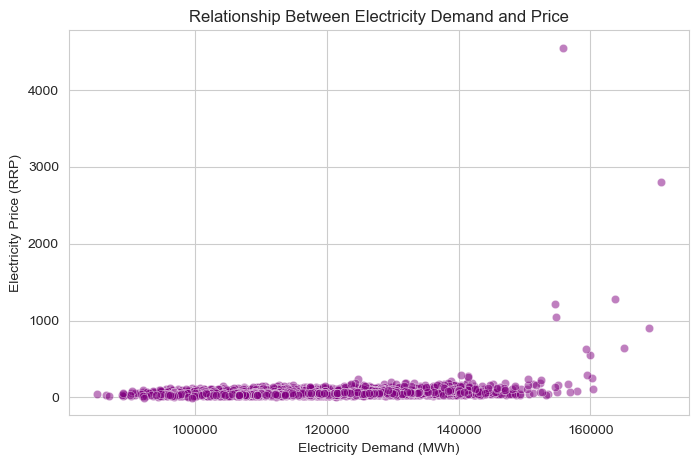

,demand,RRP
demand,1.000000,0.217538
RRP,0.217538,1.000000


In [10]:
corr_matrix = df[["demand", "RRP"]].corr()

plt.figure(figsize=(8, 5))
sns.scatterplot(x=df["demand"], y=df["RRP"], alpha=0.5, color="purple")
plt.xlabel("Electricity Demand (MWh)")
plt.ylabel("Electricity Price (RRP)")
plt.title("Relationship Between Electricity Demand and Price")
plt.show()
corr_matrix

Insights on demand vs. electricity price (RRP) correlation:
Correlation Coefficient = 0.22 (weak positive correlation).
Interpretation: Higher demand slightly increases prices, but other factors (e.g., supply, market conditions, weather) likely have a stronger impact.
Scatter Plot Observations:
Most data points cluster at moderate demand and prices.
Some extreme outliers exist (high prices even at low demand), suggesting supply constraints or market disruptions.

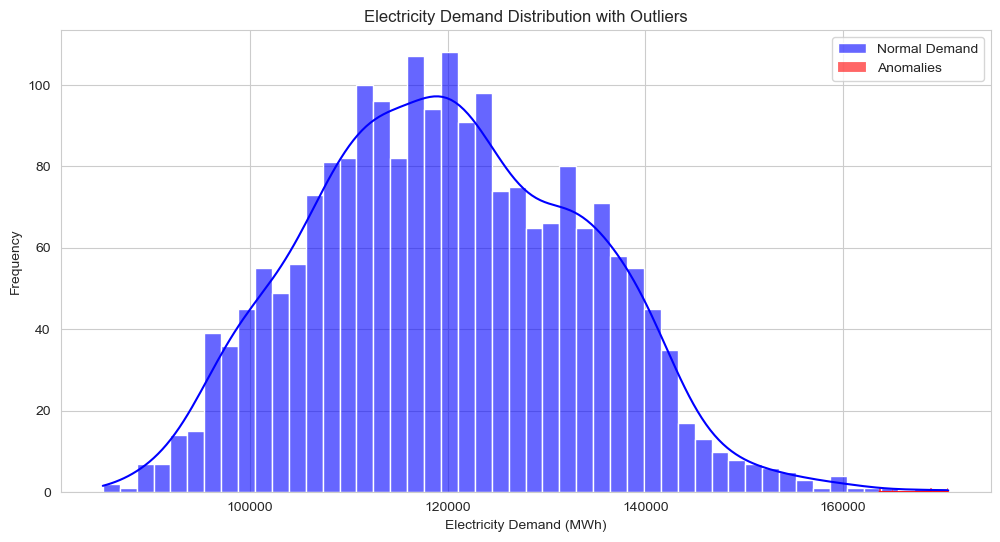

,date,demand,RRP,demand_zscore
1114,2018-01-19,165070.595,647.574163,3.276537
1485,2019-01-25,168894.845,906.437232,3.554771
1520,2019-03-01,163682.040,1284.799876,3.175513
1856,2020-01-31,170653.840,2809.437516,3.682747


In [11]:
from scipy.stats import zscore
df["demand_zscore"] = zscore(df["demand"])
demand_outliers = df[abs(df["demand_zscore"]) > 3]
plt.figure(figsize=(12, 6))
sns.histplot(df["demand"], bins=50, kde=True, color="blue", alpha=0.6, label="Normal Demand")
sns.histplot(demand_outliers["demand"], bins=50, kde=True, color="red", alpha=0.6, label="Anomalies")
plt.xlabel("Electricity Demand (MWh)")
plt.ylabel("Frequency")
plt.title("Electricity Demand Distribution with Outliers")
plt.legend()
plt.show()
demand_outliers[["date", "demand", "RRP", "demand_zscore"]].head(10)

Insights from anomaly detection:
Detected Outliers: Several days with extremely high demand (Z-score > 3).
Potential Causes:
Extreme Weather: Heatwaves or cold spells driving up electricity use.
Market Spikes: Supply shortages or regulatory events affecting prices.
Special Events: Industrial shutdowns, power outages, or unexpected economic activity.
Example Anomalies:
2019-03-01: Demand spiked to 163,682 MWh with an RRP of 1,284.8—possibly a major event.
2020-01-31: Demand reached 170,653 MWh, coinciding with a massive price surge (2,809.4 RRP).

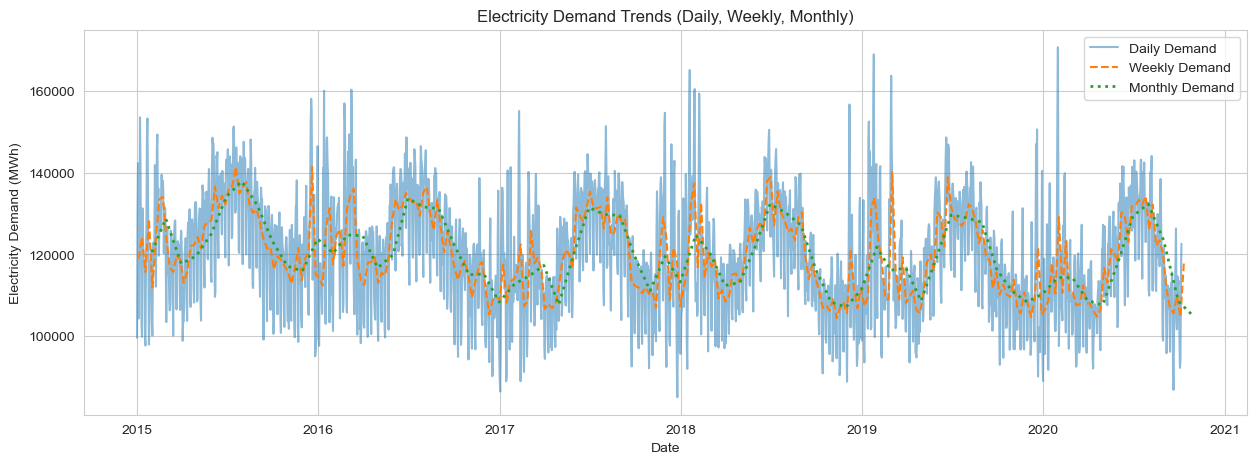

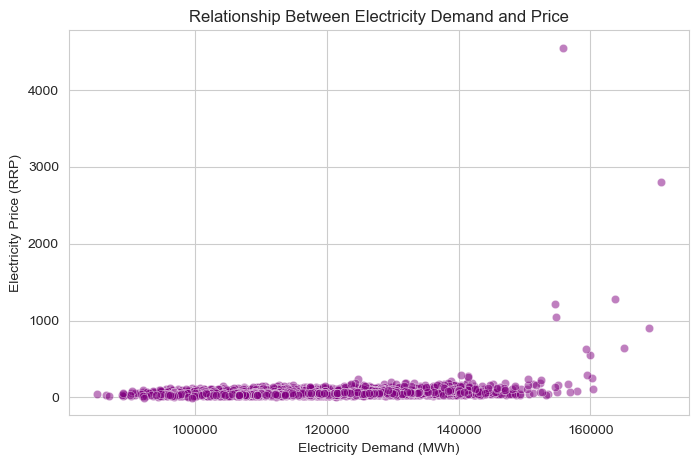

,demand,RRP
demand,1.000000,0.217538
RRP,0.217538,1.000000


In [12]:
df["date"] = pd.to_datetime(df["date"])
df.set_index("date", inplace=True)

daily_demand = df["demand"].resample("D").mean()
weekly_demand = df["demand"].resample("W").mean()
monthly_demand = df["demand"].resample("M").mean()

plt.figure(figsize=(15, 5))
plt.plot(daily_demand, label="Daily Demand", alpha=0.5)
plt.plot(weekly_demand, label="Weekly Demand", linestyle="dashed")
plt.plot(monthly_demand, label="Monthly Demand", linestyle="dotted", linewidth=2)
plt.xlabel("Date")
plt.ylabel("Electricity Demand (MWh)")
plt.title("Electricity Demand Trends (Daily, Weekly, Monthly)")
plt.legend()
plt.show()

corr_demand_price = df[["demand", "RRP"]].corr()

plt.figure(figsize=(8, 5))
sns.scatterplot(x=df["demand"], y=df["RRP"], alpha=0.5, color="purple")
plt.xlabel("Electricity Demand (MWh)")
plt.ylabel("Electricity Price (RRP)")
plt.title("Relationship Between Electricity Demand and Price")
plt.show()

corr_demand_price

Business solutions, cost optimization opportunities:-
Capacity planning
Grid management
Energy storage solutions

Capacity planning: Use long-term demand trends to forecast future electricity needs and inform decisions on expanding generation capacity and grid infrastructure.
Grid management: Leverage insights into daily and weekly demand fluctuations to optimize real-time grid operations.
Energy storage solutions: Utilize demand data to assess the potential for energy storage systems to mitigate peak demand.


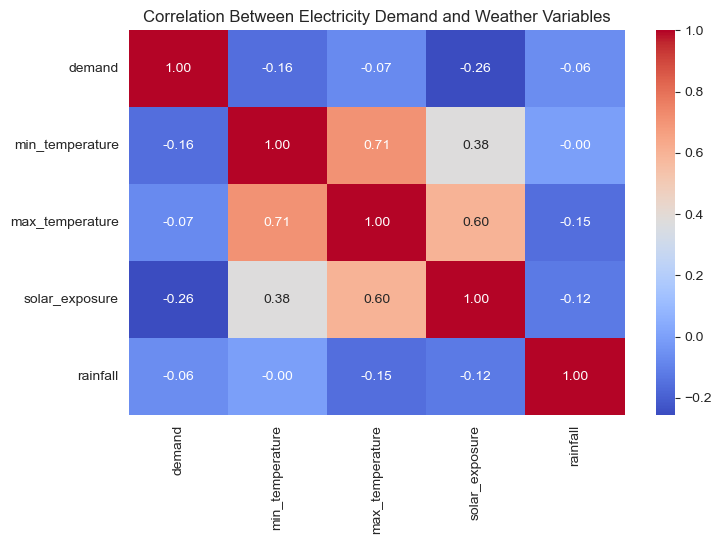

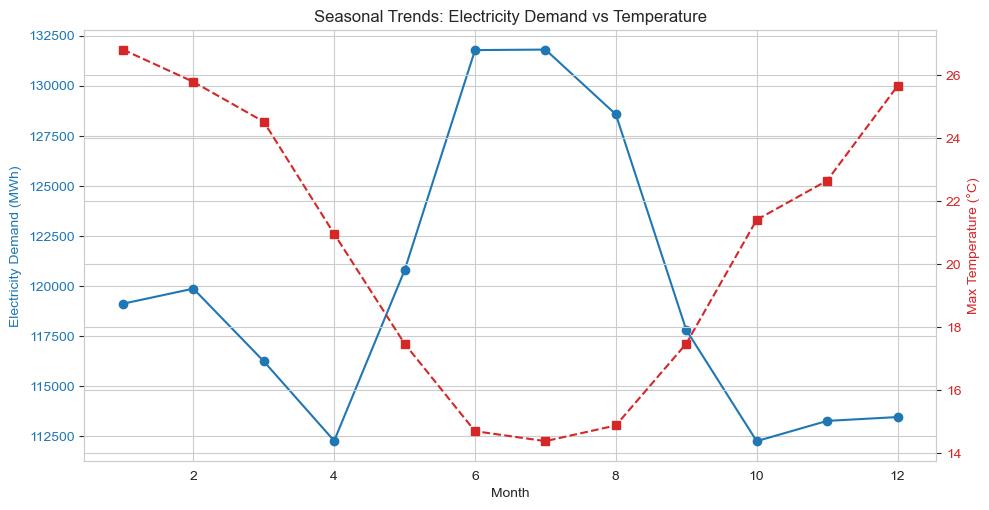

,demand,min_temperature,max_temperature,solar_exposure,rainfall
demand,1.000000,-0.156118,-0.073216,-0.257260,-0.064662
min_temperature,-0.156118,1.000000,0.705433,0.375740,-0.002938
max_temperature,-0.073216,0.705433,1.000000,0.598608,-0.154980
solar_exposure,-0.257260,0.375740,0.598608,1.000000,-0.123363
rainfall,-0.064662,-0.002938,-0.154980,-0.123363,1.000000


In [17]:
weather_corr = df[["demand", "min_temperature", "max_temperature", "solar_exposure", "rainfall"]].corr()

plt.figure(figsize=(8, 5))
sns.heatmap(weather_corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Between Electricity Demand and Weather Variables")
plt.show()
monthly_weather_demand = df.groupby("month")[["demand", "max_temperature", "solar_exposure", "rainfall"]].mean()

fig, ax1 = plt.subplots(figsize=(10, 5))

ax1.set_xlabel("Month")
ax1.set_ylabel("Electricity Demand (MWh)", color="tab:blue")
ax1.plot(monthly_weather_demand.index, monthly_weather_demand["demand"], marker="o", label="Demand", color="tab:blue")
ax1.tick_params(axis="y", labelcolor="tab:blue")

ax2 = ax1.twinx()
ax2.set_ylabel("Max Temperature (°C)", color="tab:red")
ax2.plot(monthly_weather_demand.index, monthly_weather_demand["max_temperature"], marker="s", linestyle="dashed", color="tab:red", label="Max Temperature")
ax2.tick_params(axis="y", labelcolor="tab:red")

fig.tight_layout()
plt.title("Seasonal Trends: Electricity Demand vs Temperature")
plt.show()

weather_corr


Correlation with temperature

Demand has a weak negative correlation with both minimum (-0.16) and maximum (-0.07) temperature, meaning electricity consumption slightly decreases as temperature rises.
This suggests that in this dataset, electricity demand is higher in colder months (likely due to heating needs) than in extremely hot months.

Impact of solar exposure

A moderate negative correlation (-0.26) exists between demand and solar exposure.
This indicates that higher solar exposure reduces electricity demand, possibly due to reduced lighting/heating needs during sunny days.

Effect of rainfall

Rainfall shows almost no correlation (-0.06) with electricity demand, suggesting that rainfall does not significantly impact electricity consumption.
However, extreme weather events (storms) might still cause temporary demand surges.

Seasonal Trends in Demand

Winter electricity pricing strategies should account for higher demand.
Solar energy optimization could be explored for demand reduction in high-exposure regions.
Temperature-based demand forecasting models could improve efficiency.